# Proyecto 1 Parte 1 Inteligencia de Negocios
###Grupo: G23
###Integrantes:
- Andres Molina - 201923434

## 1. (10%)Entendimiento de negocio y enfoque analitico

**Oportunidad/Problema Del Negocio**: La oportunidad de negocio es el análisis de sentimientos de comentarios de películas en español, con el fin de clasificarlos como positivos o negativos. Esta tarea puede ayudar a las empresas de cine y a las plataformas de streaming a entender mejor la percepción de los usuarios sobre sus producciones y así tomar decisiones de negocio más informadas.

**Enfoque analítico**: El enfoque analítico propuesto para este proyecto consiste en la utilización de técnicas de procesamiento de lenguaje natural y aprendizaje automático para clasificar los comentarios de las películas como positivos o negativos. Se proponen la utilización de un modelos Random Forest, KNN y Arbol de decision extendido para realizar la tarea de clasificación.

**Organización y rol dentro de ella que se beneficia con la oportunidad definida**: Las empresas de cine y las plataformas de streaming son las principales beneficiarias de este análisis, ya que les permitirá entender mejor la percepción de los usuarios sobre sus producciones y tomar decisiones de negocio más informadas.

**Técnicas y algoritmos a utilizar**: El enfoque analítico propuesto utilizará técnicas de procesamiento de lenguaje natural y aprendizaje automático para clasificar los comentarios de las películas como positivos o negativos. Además de Random Forest, vamos a utilizar otros dos algoritmos de clasificacion debido a la naturaleza del objetivo; Arbol de decision y KNN.

## 2. (25%) Entendimiento y preparacion de los datos

###Importacion de librerías y lectura de datos


In [2]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 37.7 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: vision

In [3]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 15.2 MB/s eta 0:00:00


In [5]:
from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

# Pandas
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas
pd.set_option('display.max_rows', 50) # Numero máximo de filas

# Numpy
import numpy as np
np.random.seed(3301)

# Seaborn
import seaborn as sns 

# Matplolib
%matplotlib inline
import matplotlib.pyplot as plt

# librerias para trabajar con texto
import unicodedata
import string
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import re
import contractions
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
import inflect
import nltk
# Punkt permite separar un text en frases.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
db_route = 'sample_data/MovieReviews.csv'
df_originales = pd.read_csv(db_route, encoding = 'ISO-8859-1')

# Imprimir número de filas
print('Número de filas: ', df_originales.shape[0])
# Imprimir número de columnas
print('Número de columnas: ', df_originales.shape[1])

pd.set_option('display.max_columns', None)
df_originales.sample(5)

Número de filas:  5000
Número de columnas:  3


,Unnamed: 0,review_es,sentimiento
3627,3627,"Antes de empezar, permÃ­tanme decir que mi exp...",negativo
3737,3737,PensarÃ­as que el primer aterrizaje en la luna...,negativo
4386,4386,"Esta pelÃ­cula es, con mucho, la peor pelÃ­cul...",negativo
2953,2953,La primera vez que vi esto reproducÃ© con horr...,negativo
645,645,Esta pelÃ­cula se realizÃ³ justo en el Ã¡rea d...,positivo


<Axes: title={'center': 'sentimiento'}>

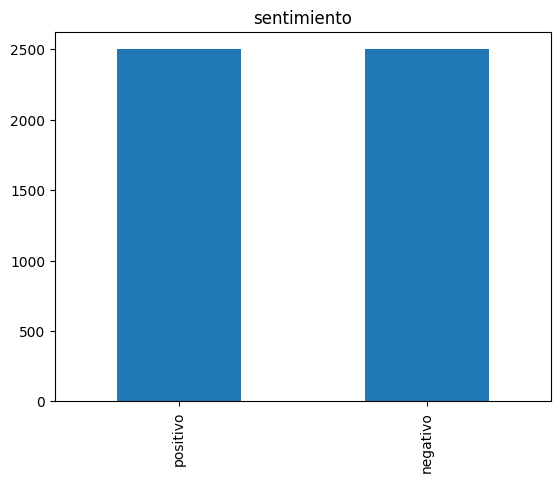

In [7]:
# Visualizar en gráfica de barras cantidad de valores por valor en la columna 'sentimiento'
df_originales['sentimiento'].value_counts().plot(kind='bar', title='sentimiento')

Para las primeras pruebas en busca de disminuir los tiempos de ejecución, se utilizan solo 5000 registros aleatorios. Estos 5000 registros, se seleccionan balanceados entre registros clasificados como registros positivos y negativos. Ya cuando se tenga el modelo probado, se utilizarán todos los datos.

In [8]:
df_originales = df_originales.groupby('sentimiento', group_keys=False).apply(lambda x: x.sample(min(len(x), 2500)))
df_originales = df_originales.sample(n=5000)

## Imprimir número de filas
print('Número de filas: ', df_originales.shape[0])
## Imprimir número de columnas
print('Número de columnas: ', df_originales.shape[1])

Número de filas:  5000
Número de columnas:  3


##Limpieza y entendimiento de los datos


In [9]:

# Ver datos nulos
print("\nNúmero de filas con valores nulos: ", df_originales.isnull().any(axis=1).sum())
print("Número de columnas con valores nulos: ", df_originales.isnull().any().sum())

# Porcentaje de completitud
print(f"\nPorcentaje de completitud de las columnas: {(1-(df_originales.isnull().any(axis=1).sum()/df_originales.shape[0]))*100:.2f}%")


Número de filas con valores nulos:  0
Número de columnas con valores nulos:  0

Porcentaje de completitud de las columnas: 100.00%


In [10]:
# Ver duplicidad de datos
print("\nNúmero de filas duplicadas: ", df_originales.duplicated().sum())
print("Número de filas con indice duplicado: ", df_originales['Unnamed: 0'].duplicated().sum())


Número de filas duplicadas:  0
Número de filas con indice duplicado:  0


In [11]:
# Eliminar columna 'Unnamed: 0'
df_originales.drop('Unnamed: 0', axis=1, inplace=True)
# Convertir valores de la columna review_es a string
df_originales['review_es'] = df_originales['review_es'].astype(str)

In [12]:
# Obtener valores únicos columna 'class' 
print(df_originales['sentimiento'].value_counts())

# En la columna 'sentimiento' cambiar valores 'negativo' por 0 y 'positivo' por 1
df_originales['sentimiento'] = df_originales['sentimiento'].replace({'negativo': 0, 'positivo':1})

# Obtener valores únicos columna 'sentimiento' 
print(df_originales['sentimiento'].value_counts())

# Convertir la columna en numerica
df_originales['sentimiento'] = df_originales['sentimiento'].astype(int)

negativo    2500
positivo    2500
Name: sentimiento, dtype: int64
0    2500
1    2500
Name: sentimiento, dtype: int64


## Procesamiento de texto

Por motivos de sencilles y tiempos de respuesta empleamos un preprocesamiento antes de separar los datos en tokens. Eliminamos los caracteres especiales, puntuación y números, y se convierte el texto a minúscula, ya que considerar mayúsculas o minusculas no tiene sentido.

In [14]:
# Eliminar caracteres distintos al alfabeto en la columna 'review_es'
df_originales['review_es'] = df_originales['review_es'].str.replace('[^a-zA-Z ]', '')

# Convertir columna review_es a minúsculas
df_originales['review_es'] = df_originales['review_es'].str.lower()

<ipython-input-14-d70830359019>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_originales['review_es'] = df_originales['review_es'].str.replace('[^a-zA-Z ]', '')


Métodos para preprocesamiento de texto:

In [15]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode(
            'ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def remove_words_without_vowels(words):
    """Remove words without vowels from list of tokenized words"""
    new_words = []
    for word in words:
        if re.search('[aeiouy]', word):
            new_words.append(word)
    return new_words

def preprocessing(words):
    # words = to_lowercase(words)
    # words = replace_numbers(words)
    # words = remove_punctuation(words)
    # words = remove_non_ascii(words)
    words = remove_words_without_vowels(words)
    words = remove_stopwords(words)
    return words

In [16]:
df_modelo = df_originales.copy()
df_modelo['review_es'] = df_modelo['review_es'].apply(contractions.fix)

In [17]:
df_modelo['tokens'] = df_modelo['review_es'].apply(word_tokenize).apply(preprocessing) 
# Eliminar tokens vacíos y con longitud menor a 2
df_modelo['tokens'] = df_modelo['tokens'].apply(lambda x: [item for item in x if item != '' and (len(item) >= 2 or item == 'i')])

Métodos lematización y eliminación de prefijos y sufijos (stemming) [PROCESO DE NORMALIZACIÓN]:

In [18]:
def stem_words(words):
    # Stem: cortar la raíz de una palabra
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems + lemmas

In [19]:
# Aplica lematización y Eliminación de Prefijos y Sufijos.
df_modelo['tokens'] = df_modelo['tokens'].apply(stem_and_lemmatize)

df_modelo.sample(5)

,review_es,sentimiento,tokens
2029,sinceramente no s qu palabras imdb me permitir...,1,"[sincera, qu, palabra, imdb, permitir, us, en,..."
4687,desde el principio hasta que haya estado en el...,0,"[desd, el, principio, hast, que, hay, estado, ..."
1761,esta pelcula es uno de los mejores pantalones ...,1,"[est, pelcul, es, uno, de, los, mej, pantalon,..."
2703,wow es todo lo que puedo decir si su lectura s...,0,"[wow, es, todo, lo, que, puedo, decir, si, su,..."
4791,truly awful obviously an attempt to cash in on...,0,"[tru, aw, obvy, attempt, cash, star, war, craz..."


In [20]:
df_modelo['tokens'] = df_modelo['tokens'].apply(
    lambda x: ' '.join(map(str, x)))

In [21]:
# Eliminación de columna 'review_es' para disminuir el tamaño del dataset
df_modelo.drop('review_es', axis=1, inplace=True)

# Eliminar filas con valores nulos
df_modelo.dropna(inplace=True)

## Vectorización de texto

La vectorización de datos se va a realizar utilizando la librería sklearn.feature_extraction.text.TfidfVectorizer.

## Exportacion de los datos
#### En este caso se hace una exportacion de los datos por sencilles. Ya que cada integrante trabajara su algoritmo en un notebook diferente. Por lo que lo mas sencillo es separar este entendimiento y limpieza de datos de la implementacion de los algoritmos.

In [23]:
from pathlib import Path

try:
    filepath = Path('sample_data/processed_data.csv')
    df_modelo.to_csv(filepath, index=False)
    print("Archivo guardado")
except Exception as e:
    print("Error guardando el archivo: " + str(e))

Archivo guardado
